# How to calculate astrometric paths of stars on the sky

This notebook shows how to calculate the coordinate directions to a star, as seen by the observer, as a function of time, thus accounting for the effects of both proper motion and parallax. Although the principles behind the calculation are straighforward, plotting the resulting path on the sky is tricky, especially in situations where the star crosses the $\alpha=0$ or $\alpha=\pi$ meridians or when it is moving very close to the celestial poles. These problems are most conveniently dealt with by resorting to local plane coordinates, as defined by equation 1.2.22 in section 1.2.9 of the [Hipparcos documentation](https://ui.adsabs.harvard.edu/#abs/1997ESASP1200.....E/abstract) (see [this link](https://www.cosmos.esa.int/documents/532822/552851/vol1_all.pdf/99adf6e3-6893-4824-8fc2-8d3c9cbba2b5) for the PDF document).

## Calculation of the observer-centric (topocentric) coordinate direction to a source

The aim is to calculate as a function of time the direction in which a source &ndash; with astrometric parameters $\alpha$, $\delta$, $\varpi$, $\mu_{\alpha*}$, $\mu_\delta$, and radial velocity $v_\mathrm{rad}$ &ndash; is located on the celestial sphere, as seen by an observer in orbit about the solar system barycentre, for example a (hypothetical) observer at the earth's geocentre. Only the so-called _coordinate direction_ is calculated (with respect to the Barycentric Celestial Reference System or BCRS), which means that effects like abberation, light bending and any effects associated to observations from the earth's surface, are ignored. The topocentric coordinate direction $\boldsymbol{u}$ of the source as a function of time is the calculated as (see also equation 1.2.12 in section 1.2.8 of the Hipparcos documentation)

\begin{equation}
    \boldsymbol{u}(t) = \langle \boldsymbol{b}(t_\mathrm{ep}) + 
    \boldsymbol{V}\times(t_\mathrm{B}-t_\mathrm{ep}) - \boldsymbol{b}_\mathrm{O}(t)\rangle =
    \begin{pmatrix}
        \cos\delta(t)\cos\alpha(t) \\ \cos\delta(t)\sin\alpha(t) \\ \sin\delta(t)
    \end{pmatrix}\,,
\end{equation}

where $\langle\rangle$ indicates normalization, $\boldsymbol{b}(t_\mathrm{ep})$ is the barycentric position vector of the source at epoch $t_\mathrm{ep}$, $\boldsymbol{V}$ is the constant barycentric space velocity of the source, and $\boldsymbol{b}_\mathrm{O}$ is the barycentric position vector of the observer. The quantity $t_\mathrm{B}$ is the time of observation corrected for the Roemer delay, which accounts for the fact that the time of observation (at the position of the observer) will occur slightly before or after the light from the source reaches the solar system barycentre (the point to which the astrometric parameters of a source are referred). The Roemer delay is added to $t$ according to

\begin{equation}
    t_\mathrm{B}=t+\boldsymbol{r}_0'\boldsymbol{b}_\mathrm{O}(t)/c\,,
\end{equation}

where $\boldsymbol{r}_0=\boldsymbol{u}(t_\mathrm{ep})$ is the coordinate direction to the source at $t_\mathrm{ep}$ and the dot product $\boldsymbol{r}_0'\boldsymbol{b}_\mathrm{O}(t)$ indicates the extra distance light must travel between the observer and the solar system barycentre.

The resulting coordinate directions are right ascension $\alpha$ and declination $\delta$. Note that this vector calculation is the most rigorous way of obtaining the coordinate directions as a function of time, as apart from the simplistic model of stellar motion no approximations are made.

### Direct calculation in terms of the astrometric parameters

The procedure outlined above for propagating the source position on the sky requires first calculating the value of $\boldsymbol{V}$ from the astrometric parameters and radial velocity of the source. This transformation involves the so-called normal triad $[\boldsymbol{p}_0, \boldsymbol{q}_0, \boldsymbol{r}_0]$ which is defined by the position of the source at the reference epoch, $\alpha_0=\alpha(t_\mathrm{ep})$ and $\delta_0=\delta(t_\mathrm{ep})$

\begin{equation}
    \boldsymbol{p}_0 = \begin{pmatrix}
        -\sin\alpha_0 \\ \cos\alpha_0 \\ 0
    \end{pmatrix}\,, \quad
    \begin{matrix}
        \boldsymbol{q}_0 = \begin{pmatrix}
            -\sin\delta_0\cos\alpha_0 \\ -\sin\delta_0\sin\alpha_0 \\ \cos\delta_0
        \end{pmatrix}
    \end{matrix}\,, \quad
    \boldsymbol{r}_0 = \begin{pmatrix}
        \cos\delta_0\cos\alpha_0 \\ \cos\delta_0\sin\alpha_0 \\ \sin\delta_0
    \end{pmatrix}\,.
\end{equation}

The components of $\boldsymbol{V}$ can then be calculated as

\begin{equation}
    \begin{pmatrix}
        V_x \\ V_y \\ V_z
    \end{pmatrix} = 
    \begin{pmatrix}
        \boldsymbol{p}_0 & \boldsymbol{q}_0 & \boldsymbol{r}_0
    \end{pmatrix}
    \begin{pmatrix}
        \mu_{\alpha*}/\varpi \\
        \mu_\delta/\varpi \\
        v_\mathrm{rad}/A_V
    \end{pmatrix}\,,
\end{equation}

where the proper motions are in radians/year, the parallax in radians (i.e. distances in AU), and the radial velocity in km/s. In these units the components of $\boldsymbol{V}$ are in AU/yr and $A_V=4.74047\ldots$ is the factor that translates the radial velocity from units of km/s to AU/yr. The resulting velocity vector could be used in the above propagation equation but that involves a transformation from astrometric to phase space parameters and back. In addition, as pointed out in section 1.2.8 of the Hipparcos documentation, this method of propagating the coordinate direction has the drawback of involving factors of $1/\varpi$.

Now, using distance units of AU and time units of Julian years, the above propagation equation can be written as

\begin{equation}
    \boldsymbol{u}(t) = \langle\frac{\boldsymbol{r}_0}{\varpi} + \boldsymbol{V}\Delta t -
    \boldsymbol{b}_\mathrm{O}(t)\rangle\,,
\end{equation}

with $\Delta t= t_\mathrm{B}-t_\mathrm{ep}$ and where $\boldsymbol{b}(t_\mathrm{ep}) = \boldsymbol{r}_0/\varpi$. Using the components of $\boldsymbol{V}$ this can be written out as

\begin{equation}
    \boldsymbol{u}(t) = \langle
    \frac{\boldsymbol{r}_0}{\varpi} + \left(\boldsymbol{p}_0\frac{\mu_{\alpha*}}{\varpi}
    + \boldsymbol{q}_0\frac{\mu_\delta}{\varpi}
    + \boldsymbol{r}_0\frac{v_\mathrm{rad}}{A_V}\right) \Delta t - \boldsymbol{b}_\mathrm{O}(t)
    \rangle\,,
\end{equation}

which can be factored as

\begin{equation}
    \boldsymbol{u}(t) = \langle \frac{1}{\varpi}\left(
    \boldsymbol{r}_0 + \left(\boldsymbol{p}_0\mu_{\alpha*}
    + \boldsymbol{q}_0\mu_\delta 
    + \boldsymbol{r}_0v_\mathrm{rad}\frac{\varpi}{A_V}\right)\Delta t - 
    \varpi\boldsymbol{b}_\mathrm{O}(t)\right)
    \rangle\,.
\end{equation}

The overall factor $1/\varpi$ will dissappear after normalization, leaving the expression

\begin{equation}
    \boldsymbol{u}(t) = \langle
    \boldsymbol{r}_0 + \left(\boldsymbol{p}_0\mu_{\alpha*}
    + \boldsymbol{q}_0\mu_\delta 
    + \boldsymbol{r}_0\mu_r\right)\Delta t - 
    \varpi\boldsymbol{b}_\mathrm{O}(t)/A_\mathrm{u}
    \rangle\,.
\end{equation}

where $\mu_r=v_\mathrm{rad}\varpi/A_V$ (the "radial proper motion"), and for clarity the barycentric position vector to the observer is explicitly divided by the astronomical unit.

Note that this form of the propagation equation is the same as the more intuitive vector expression above, meaning again that no approximations are made. This form of calculation however avoids the back and forth between phase space coordinates and astrometric parameters. _Keep in mind that the units of angle should be radians and the units of time Julian years, while the distance unit is the AU._

## Plotting the sky path

The values of $\alpha(t)$ and $\delta(t)$ could in principle be used directly by plotting them through some cartographic projection method. However the range of angles is typically very small (much less than $10^{-6}$ radian) when one is far from the celestial poles, while close to the poles the value of $\alpha(t)$ can span the full range from $0$ to $2\pi$ (as the star makes its parallactic motion around the pole), while $\delta(t)$ remains within $<10^{-6}$ radians from $\pm\pi/2$. This makes it necessary to choose an appropriate projection method depending on the astrometric parameters of the star and on whether it crosses the $\alpha=0$ meridian (where it is assumed that values of $\alpha$ are always reported as between $0$ and $2\pi$).

This problem can be tackled by reporting the source positions with respect to its position at the reference epoch $\alpha_0=\alpha(t_\mathrm{ep})$ and $\delta_0=\delta(t_\mathrm{ep})$ as

\begin{equation}
    \Delta\alpha* = (\alpha(t)-\alpha_0)\cos\delta(t) \quad\text{and}\quad
    \Delta\delta = \delta(t)-\delta_0\,,
\end{equation}

and then plotting $\Delta\alpha*$ and $\Delta\delta$. However this only works away from the celestial poles and the $\alpha=0$ meridian. In particular paths very close to the celestial poles will cause nasty problems when trying to plot them.

The way to get around this is to calculate the local plane coordinates for the star with respect to the reference position $(\alpha_0,\delta_0)$. The local plane is defined by the vectors $\boldsymbol{p}_0$ and $\boldsymbol{q}_0$ of the normal triad $[\boldsymbol{p}_0, \boldsymbol{q}_0, \boldsymbol{r}_0]$. These vectors indicate at $t_\mathrm{ep}$ the directions of increasing right ascension $\boldsymbol{p}_0$, increasing declination $\boldsymbol{q}_0$, and the coordinate direction of the star $\boldsymbol{r}_0$. The local plane coordinates of the star are then calculated as:

\begin{equation}
    \xi(t) = \frac{\boldsymbol{p}_0'\boldsymbol{u}(t)}{\boldsymbol{r}_0'\boldsymbol{u}(t)} \quad\text{and}\quad
    \eta(t) = \frac{\boldsymbol{q}_0'\boldsymbol{u}(t)}{\boldsymbol{r}_0'\boldsymbol{u}(t)}\,.
\end{equation}

In the typical case one can equate $\Delta\alpha*$ with $\xi$ and $\Delta\delta$ with $\eta$ (except close to the poles), but the local plane coordinates are in addition well defined and behaved at the celestial poles and for stars crossing the $\alpha=0$ meridian.

### Worked out expressions for local plane coordinates

The equations for $\xi$ and $\eta$ above can be worked out further to give

\begin{equation}
    \xi(t) = \frac{\cos\delta(t)\sin(\alpha(t)-\alpha_0)}
    {\cos\delta_0\cos\delta(t)\cos(\alpha(t)-\alpha_0)+\sin\delta_0\sin\delta(t)}
    \quad\text{and}\quad
    \eta(t) = \frac{-\sin\delta_0\cos\delta(t)\cos(\alpha(t)-\alpha_0)+\cos\delta_0\cos\delta(t)}
    {\cos\delta_0\cos\delta(t)\cos(\alpha(t)-\alpha_0)+\sin\delta_0\sin\delta(t)}\,.
\end{equation}

Far from the celestial poles on normally has $|\alpha(t)-\alpha_0|\ll1$ and $|\delta(t)-\delta_0|\ll1$ so that approximately

\begin{equation}
    \xi(t) \approx (\alpha(t)-\alpha_0)\cos\delta(t) = \Delta\alpha* \quad\text{and}\quad
    \eta(t) \approx \delta(t)-\delta_0 = \Delta\delta\,.
\end{equation}

Close to the celestial poles one no longer has that $|\alpha(t)-\alpha_0|\ll1$ and then the approximations $\sin(\alpha(t)-\alpha_0)\approx\Delta\alpha$ and $\cos(\alpha(t)-\alpha_0)\approx1$ break down.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import subprocess

from scipy.stats import uniform

import cartopy.crs as ccrs

from astropy import constants
from astropy import units
from astropy.time import Time
from astropy.coordinates import get_body_barycentric

from skypathtools import epoch_topocentric_coordinates, epoch_barycentric_coordinates
from skypathtools import epoch_topocentric_coordinates_erfa, epoch_barycentric_coordinates_erfa

from plotstyles import useagab, apply_tufte

## Astropy barycentric earth ephemeris

To calculate the topocentric coordinate directions for a source the ephemeris of the observer must be supplied. The following function provides the ephemeris for a geocentric observer by wrapping around the [astropy](http://www.astropy.org/) tools for calculating the ephemerides for solar system bodies. 

__NOTE__ There are several versions of the solar system ephemeris available in astropy and others can be provided through a URL (see the documentation of [`astropy.coordinates.solar_system_ephemeris`](http://docs.astropy.org/en/stable/api/astropy.coordinates.solar_system_ephemeris.html#astropy.coordinates.solar_system_ephemeris)). Depending on the accuracy needed, employing  an ephemeris different from the default may be better.

In [2]:
def ephemeris_earth_astropy(t):
    """
    Calculate ephemeris for "earth" in the BCRS using astropy tools.
    
    Parameters
    ----------
    
    t : float array
        Times at which to calculate the ephemeris in Julian years TCB.
        
    Returns
    -------
    
    Array of shape (3,t.size) representing the xyz components of the ephemeris at times t. Units are AU.
    """
    times = Time(t, format='jyear', scale='tcb')
    earthEph = get_body_barycentric('earth', times)
    return np.vstack((earthEph.x.value, earthEph.y.value, earthEph.z.value))

## Calculate sky path and plot result

The calculation of the astrometric sky path is calculated with the function `epoch_topocentric_coordinates` in the [`skypathtools`](./skypathtools.py) module. The function returns both the arrays of $\alpha(t)$ and $\delta(t)$ and the local plane coordinate arrays $\xi(t)$ and $\eta(t)$

The following code blocks plot the sky path in various forms to check that the calculations are correct.

In [27]:
refepoch = 1991.25
startepoch = 1989.0
endepoch = 1993.0
npoints = 10000
    
time = np.linspace(startepoch, endepoch, npoints)

# Barnard's star
#alphadeg = 66.0
#deltadeg = 16.0
#parallax = 548.31 # mas
#mura = -798.58          # mas/yr
#mudec = 10328.12        # mas/yr
#vrad = -110.51           # km/s

# Beta Pic = HIP 27321
alphadeg = 86.82
deltadeg= -51.1
parallax = 51.44   # mas
mura = 4.65        # mas/yr
mudec = 83.10       # mas/yr
vrad = 20.0           # km/s

# Star at small parallax near pole
#alphadeg = 80.0
#deltadeg= -90.0
#parallax = 0.4   # mas
#mura = 0        # mas/yr
#mudec = 1       # mas/yr
#vrad = 0.0           # km/s

alpha = (alphadeg*units.degree).to(units.rad).value
delta = (deltadeg*units.degree).to(units.rad).value

f_ephem = ephemeris_earth_astropy

ra, dec, xi, eta = epoch_topocentric_coordinates_erfa(alpha, delta, parallax, mura, 
                                                 mudec, vrad, time, refepoch, f_ephem)

ra_bary, dec_bary, xi_bary, eta_bary = epoch_barycentric_coordinates_erfa(alpha, delta, parallax, 
                                                                     mura, mudec, vrad, time, refepoch)

ra_ref, dec_ref, xi_ref, eta_ref = epoch_topocentric_coordinates_erfa(alpha, delta, parallax, mura, mudec,
                                                                 vrad, np.array([refepoch]), refepoch, f_ephem)

### Local plane coordinates

Plot the sky path in local plane coordinates. Show both the topocentric and the barycentric paths. The latter is as seen from the solar system barycentre and thus does not involved the parallactic motion.

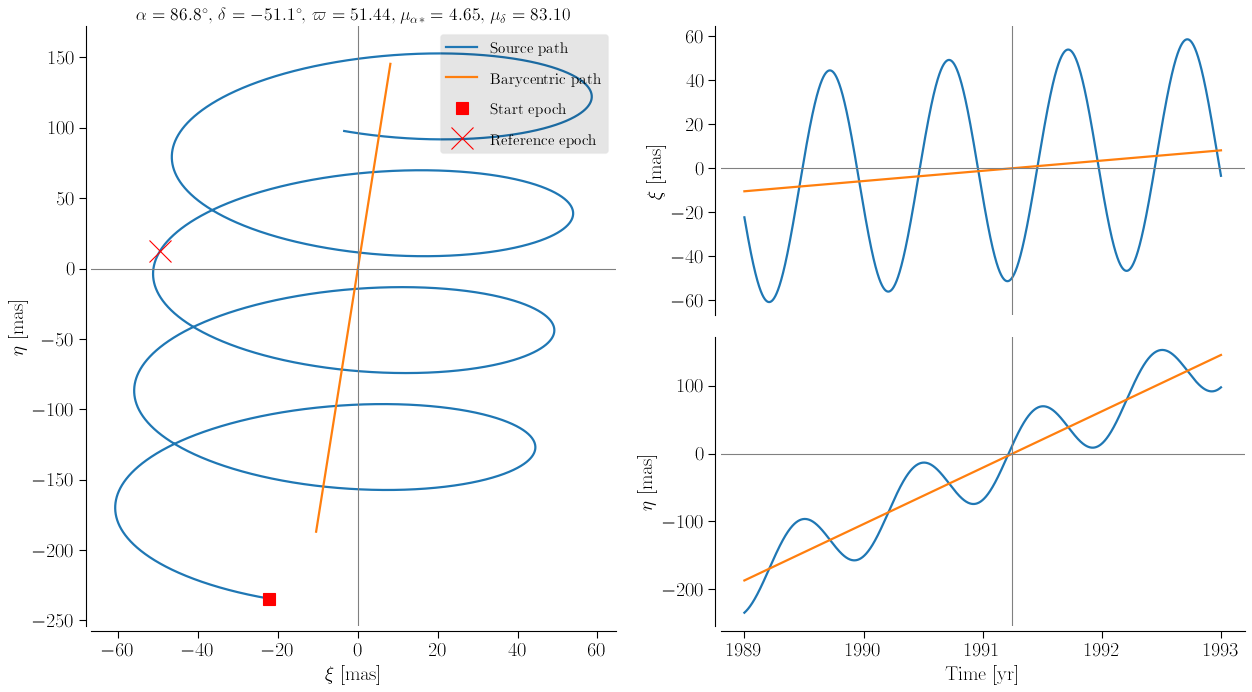

In [28]:
useagab(usetex=False, sroncolours=False, fontfam='sans')

fig = plt.figure(figsize=(16,9))
ax = fig.add_subplot(121)
apply_tufte(ax)

ax.plot(xi, eta, '-', label=r'Source path', lw=2)
ax.plot(xi_bary, eta_bary, '-', label=r'Barycentric path', lw=2)
ax.plot(xi[0], eta[0], 's', c='r', ms=10, label='Start epoch')
ax.plot(xi_ref, eta_ref, 'x', c='r', ms=20, label='Reference epoch')
ax.set_xlabel(r'$\xi$ [mas]')
ax.set_ylabel(r'$\eta$ [mas]')
ax.axhline(y=0, c='gray', lw=1)
ax.axvline(x=0, c='gray', lw=1)
ax.legend(loc='upper right', fontsize=14,  facecolor='#000000', framealpha=0.1,
         labelspacing=1)
ax.set_title(r'$\alpha={0:.1f}^\circ$, $\delta={1:.1f}^\circ$, $\varpi={2:.2f}$, $\mu_{{\alpha*}}={3:.2f}$, $\mu_\delta={4:.2f}$'.
        format(alphadeg, deltadeg, parallax, mura, mudec), fontsize=16)

ax1dra = fig.add_subplot(222)
apply_tufte(ax1dra)
ax1dra.spines['bottom'].set_visible(False)
ax1dra.xaxis.set_ticks([])
ax1dra.plot(time, xi)
ax1dra.plot(time, xi_bary)
ax1dra.set_ylabel(r'$\xi$ [mas]')
ax1dra.axvline(x=refepoch, c='gray', lw=1)
ax1dra.axhline(y=0, c='gray', lw=1)

ax1ddec = fig.add_subplot(224)
apply_tufte(ax1ddec)
ax1ddec.plot(time, eta)
ax1ddec.plot(time, eta_bary)
ax1ddec.set_xlabel(r'Time [yr]')
ax1ddec.set_ylabel(r'$\eta$ [mas]')
ax1ddec.axvline(x=refepoch, c='gray', lw=1)
ax1ddec.axhline(y=0, c='gray', lw=1)

plt.tight_layout()
plt.show()

### Direct projections of the coordinate directions

The code block below makes direct plots of $(\alpha(t), \delta(t))$ by using the Gnomonic map projection.

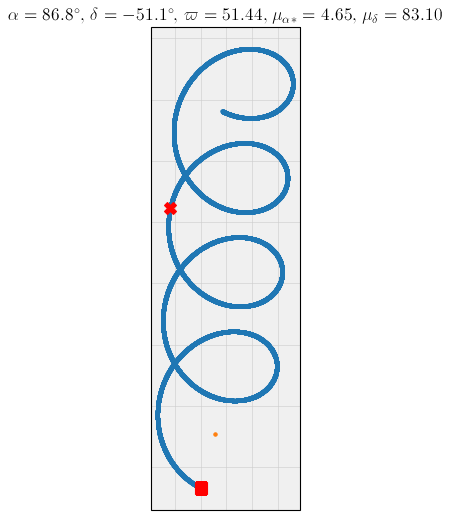

In [35]:
figproj = plt.figure(figsize=(8,8))
axproj = figproj.add_subplot(111, projection=ccrs.Gnomonic(central_latitude=deltadeg, central_longitude=alphadeg))

axproj.plot(ra*180/np.pi, dec*180/np.pi, '.', transform=ccrs.PlateCarree())
axproj.plot(ra_bary*180/np.pi, dec_bary*180/np.pi, '.', transform=ccrs.PlateCarree())
axproj.plot(ra[0]*180/np.pi, dec[0]*180/np.pi, 's', c='r', ms=10, transform=ccrs.PlateCarree())
axproj.plot(ra_ref*180/np.pi, dec_ref*180/np.pi, 'X', c='r', ms=10, transform=ccrs.PlateCarree())
axproj.set_title(r'$\alpha={0:.1f}^\circ$, $\delta={1:.1f}^\circ$, $\varpi={2:.2f}$, $\mu_{{\alpha*}}={3:.2f}$, $\mu_\delta={4:.2f}$'.
        format(alphadeg, deltadeg, parallax, mura, mudec), fontsize=16)
axproj.gridlines()

plt.show()

### Compare local plane coordinates to $\Delta\alpha*$ and $\Delta\delta$

The next code block overplots the local plane coordinates and $\Delta\alpha*$ and $\Delta\delta$ to see how good the approximations $\xi\approx\Delta\alpha*$ and $\eta\approx\Delta\delta$ are.

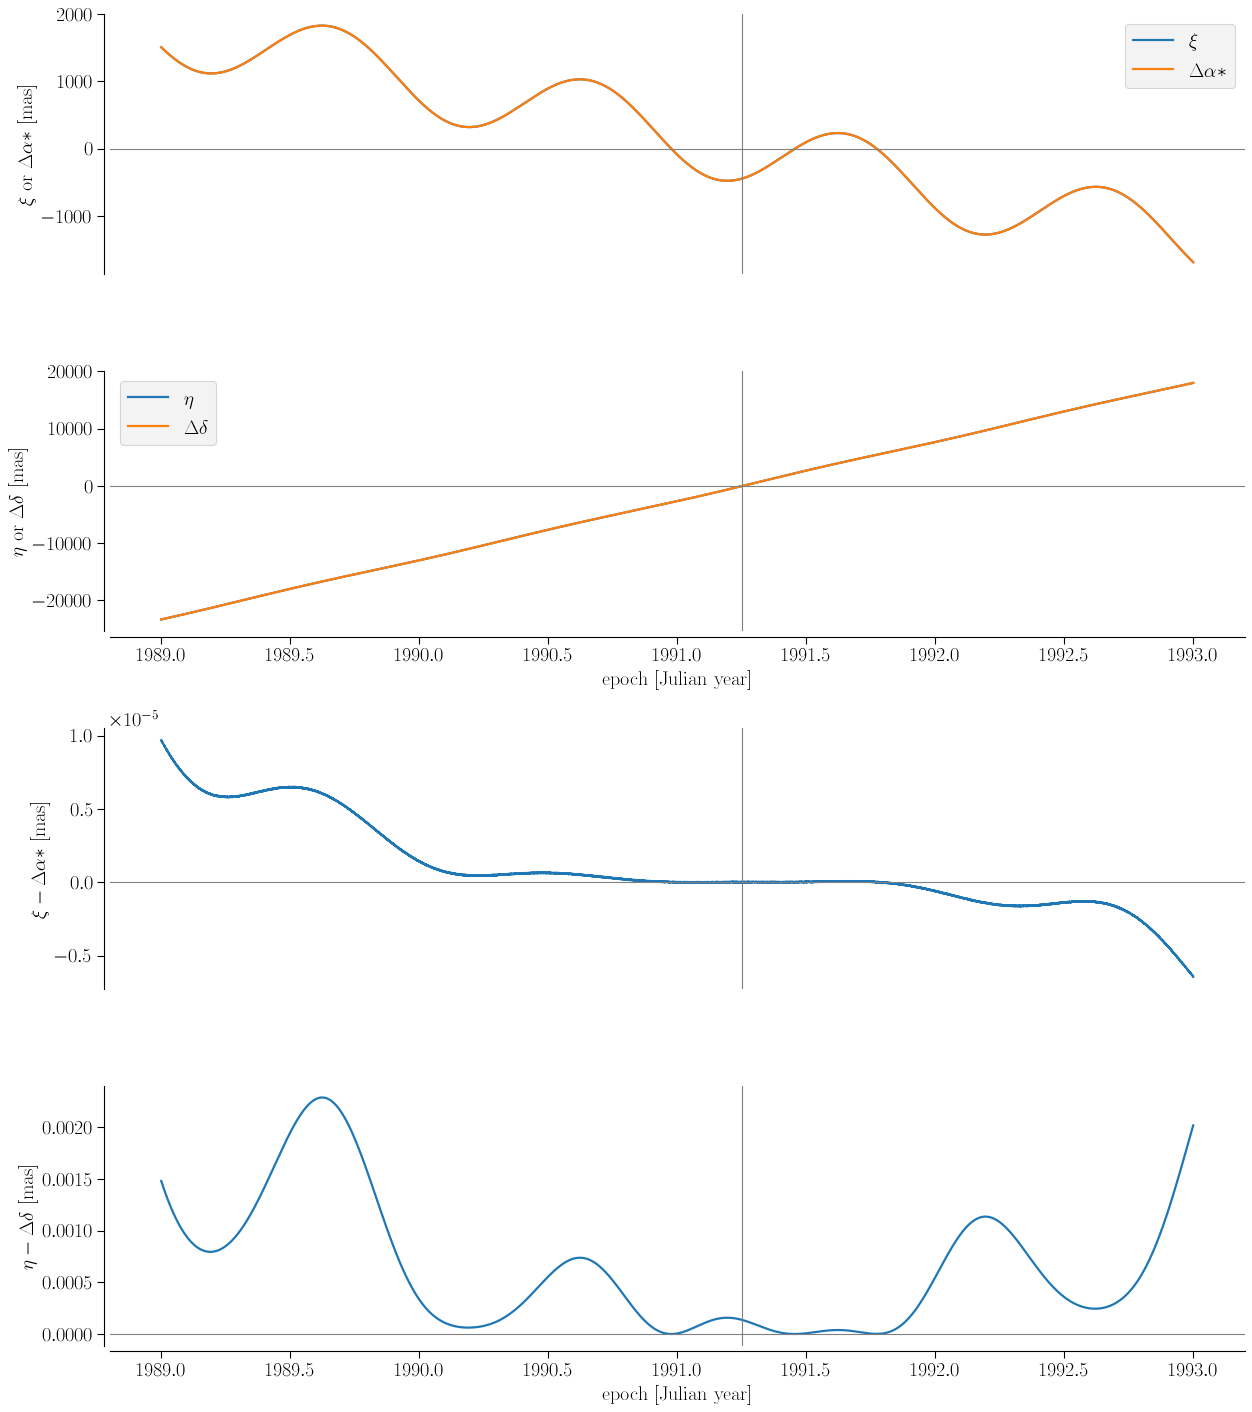

In [19]:
radtomas = 180/np.pi*(3600*1000)

figcomp = plt.figure(figsize=(16,18))
axcompXi = figcomp.add_subplot(411)
axcompEta = figcomp.add_subplot(412)
axdiffXi = figcomp.add_subplot(413)
axdiffEta = figcomp.add_subplot(414)
apply_tufte(axcompXi)
apply_tufte(axcompEta)
apply_tufte(axdiffXi)
apply_tufte(axdiffEta)

axcompXi.spines['bottom'].set_visible(False)
axcompXi.xaxis.set_ticks([])
axcompXi.plot(time, xi, label=r'$\xi$')
axcompXi.plot(time, (ra-alpha)*np.cos(dec)*radtomas, label=r'$\Delta\alpha*$')
axcompXi.set_ylabel(r'$\xi$ or $\Delta\alpha*$ [mas]')
axcompXi.axvline(x=refepoch, c='gray', lw=1)
axcompXi.axhline(y=0, c='gray', lw=1)
axcompXi.legend()

axcompEta.plot(time, eta, label=r'$\eta$')
axcompEta.plot(time, (dec-delta)*radtomas, label=r'$\Delta\delta$')
axcompEta.set_ylabel(r'$\eta$ or $\Delta\delta$ [mas]')
axcompEta.set_xlabel(r'epoch [Julian year]')
axcompEta.axvline(x=refepoch, c='gray', lw=1)
axcompEta.axhline(y=0, c='gray', lw=1)
axcompEta.legend()

axdiffXi.spines['bottom'].set_visible(False)
axdiffXi.xaxis.set_ticks([])
axdiffXi.plot(time, xi-(ra-alpha)*np.cos(dec)*radtomas)
axdiffXi.set_ylabel(r'$\xi-\Delta\alpha*$ [mas]')
axdiffXi.axvline(x=refepoch, c='gray', lw=1)
axdiffXi.axhline(y=0, c='gray', lw=1)

axdiffEta.plot(time, eta-(dec-delta)*radtomas)
axdiffEta.set_ylabel(r'$\eta-\Delta\delta$ [mas]')
axdiffEta.axvline(x=refepoch, c='gray', lw=1)
axdiffEta.axhline(y=0, c='gray', lw=1)
axdiffEta.set_xlabel(r'epoch [Julian year]')

plt.tight_layout()
plt.show()

## Compare to SOFA results

The code block below compares the outputs from [skypath.c](../skypath.c) to the python-only version of the topocentric coordinates calculation.

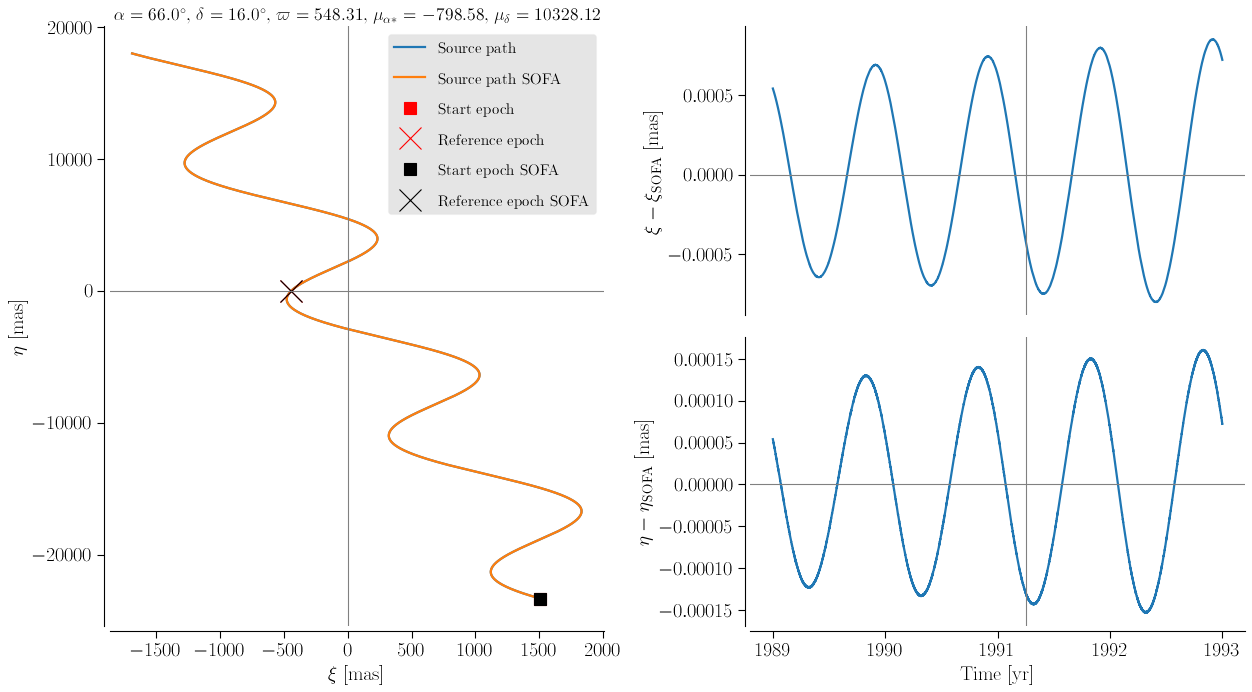

In [20]:
skyPathCommand=['../skypath']
skyPathCommand.append('-astrometry')
skyPathCommand.append('{0},{1},{2},{3},{4},{5}'.format(alphadeg,deltadeg,parallax,mura,mudec,vrad))
skyPathCommand.append('-refepoch')
skyPathCommand.append('{0}'.format(refepoch))
skyPathCommand.append('-start')
skyPathCommand.append('{0}'.format(startepoch))
skyPathCommand.append('-interval')
skyPathCommand.append('{0}'.format(endepoch-startepoch))
skyPathCommand.append('-npoints')
skyPathCommand.append('{0}'.format(npoints))

result=subprocess.run(skyPathCommand, stdout=subprocess.PIPE)
skyPath=result.stdout.splitlines()
times_sofa=np.empty(len(skyPath))
alpha_sofa=np.empty(len(skyPath))
delta_sofa=np.empty(len(skyPath))
xi_sofa=np.empty(len(skyPath))
eta_sofa=np.empty(len(skyPath))
for i in range(len(skyPath)):
    times_sofa[i], alpha_sofa[i], delta_sofa[i], xi_sofa[i], eta_sofa[i] = skyPath[i].split()
    
figcomp = plt.figure(figsize=(16,9))
axcomp = figcomp.add_subplot(121)
apply_tufte(axcomp)

axcomp.plot(xi, eta, '-', label=r'Source path', lw=2)
axcomp.plot(xi_sofa, eta_sofa, '-', label=r'Source path SOFA', lw=2)
axcomp.plot(xi[0], eta[0], 's', c='r', ms=10, label='Start epoch')
axcomp.plot(xi_ref, eta_ref, 'x', c='r', ms=20, label='Reference epoch')
axcomp.plot(xi[0], eta[0], 's', c='k', ms=10, label='Start epoch SOFA')
axcomp.plot(xi_ref, eta_ref, 'x', c='k', ms=20, label='Reference epoch SOFA')
axcomp.set_xlabel(r'$\xi$ [mas]')
axcomp.set_ylabel(r'$\eta$ [mas]')
axcomp.axhline(y=0, c='gray', lw=1)
axcomp.axvline(x=0, c='gray', lw=1)
axcomp.legend(loc='upper right', fontsize=14,  facecolor='#000000', framealpha=0.1,
         labelspacing=1)
axcomp.set_title(r'$\alpha={0:.1f}^\circ$, $\delta={1:.1f}^\circ$, $\varpi={2:.2f}$, $\mu_{{\alpha*}}={3:.2f}$, $\mu_\delta={4:.2f}$'.
        format(alphadeg, deltadeg, parallax, mura, mudec), fontsize=16)

ax1dracomp = figcomp.add_subplot(222)
apply_tufte(ax1dracomp)
ax1dracomp.spines['bottom'].set_visible(False)
ax1dracomp.xaxis.set_ticks([])
ax1dracomp.plot(time, xi-xi_sofa)
ax1dracomp.set_ylabel(r'$\xi-\xi_\mathrm{SOFA}$ [mas]')
ax1dracomp.axvline(x=refepoch, c='gray', lw=1)
ax1dracomp.axhline(y=0, c='gray', lw=1)

ax1ddeccomp = figcomp.add_subplot(224)
apply_tufte(ax1ddeccomp)
ax1ddeccomp.plot(time, eta-eta_sofa)
ax1ddeccomp.set_xlabel(r'Time [yr]')
ax1ddeccomp.set_ylabel(r'$\eta-\eta_\mathrm{SOFA}$ [mas]')
ax1ddeccomp.axvline(x=refepoch, c='gray', lw=1)
ax1ddeccomp.axhline(y=0, c='gray', lw=1)

plt.tight_layout()
plt.show()